 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [4]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whale_csv_path = Path("./Resources/whale_returns.csv")
whales_csvdata = pd.read_csv(whale_csv_path, index_col = "Date", infer_datetime_format = True, parse_dates= True)
whales_csvdata.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whales_csvdata.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whales_csvdata = whales_csvdata.dropna() 
whales_csvdata.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [8]:
whales_csvdata.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algo_csv_path = Path("./Resources/algo_returns.csv")
algo_csvdata = pd.read_csv(algo_csv_path, index_col = "Date",infer_datetime_format = True, parse_dates= True)
algo_csvdata.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algo_csvdata.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_csvdata.dropna(inplace=True)
algo_csvdata.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path("./Resources/sp500_history.csv")
sp500_csv_data = pd.read_csv(sp500_csv_path, index_col="Date", infer_datetime_format = True, parse_dates= True)
sp500_csv_data = sp500_csv_data.sort_index()
sp500_csv_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [13]:
# Check Data Types
sp500_csv_data.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
sp500_csv_data["Close"] = sp500_csv_data["Close"].str.replace("$", "")
sp500_csv_data["Close"]

<ipython-input-14-a0b2859f68b4>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_csv_data["Close"] = sp500_csv_data["Close"].str.replace("$", "")


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [15]:
sp500_csv_data["Close"] = sp500_csv_data["Close"].astype("float")
sp500_csv_data.dtypes

Close    float64
dtype: object

In [17]:
sp500_csv_data.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [18]:
# Calculate Daily Returns
sp500_daily_returns = sp500_csv_data.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [19]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [20]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ["SP500 Close"]
sp500_daily_returns.head()

,SP500 Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_dataframe = pd.concat([whales_csvdata, algo_csvdata, sp500_daily_returns], axis = "columns", join = "inner")
combined_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [22]:
#combined_dataframe.iloc[0:10]

In [23]:
#combined_dataframe.loc["2015-03-03"]

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

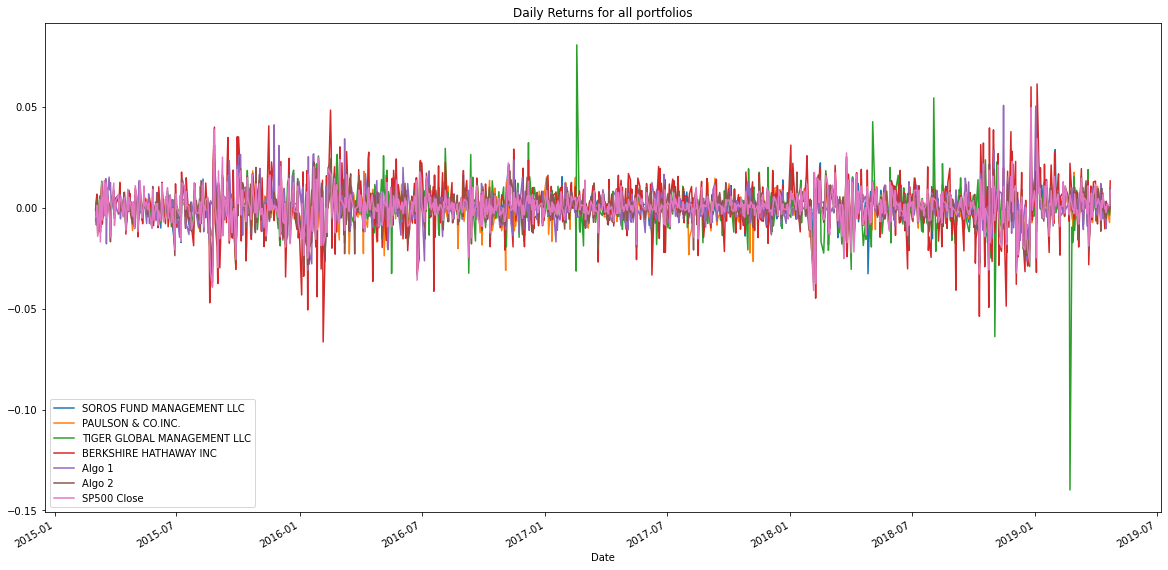

In [24]:
# Plot daily returns of all portfolios
combined_dataframe.plot(figsize =(20,10), title = "Daily Returns for all portfolios");

#### Calculate and Plot cumulative returns.

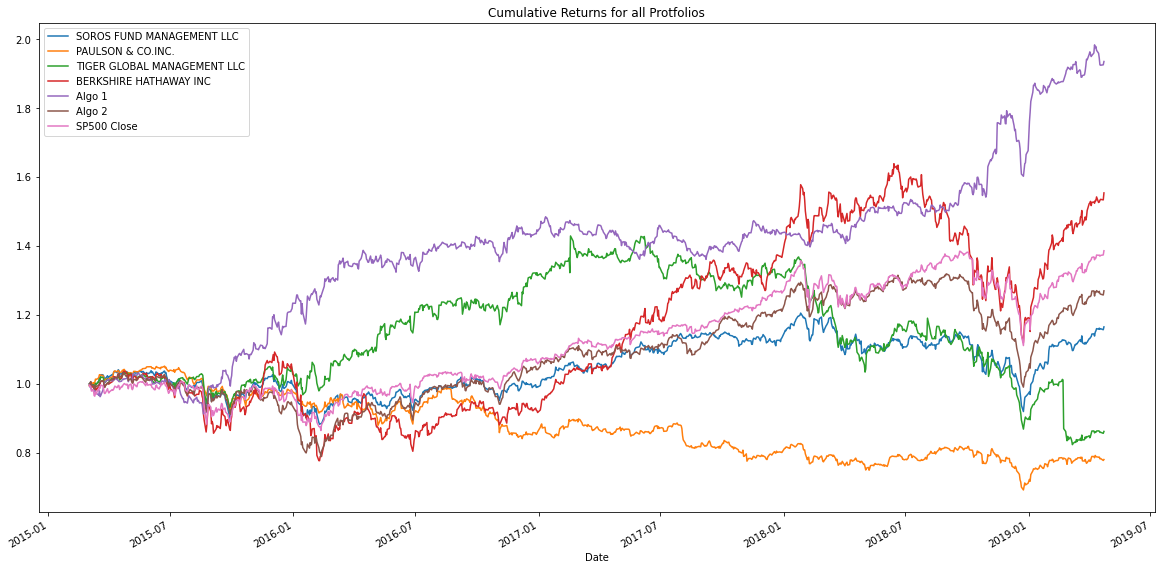

In [25]:
# Calculate cumulative returns of all portfolios
cum_retruns=(1+combined_dataframe).cumprod()
# Plot cumulative returns
cum_retruns.plot(figsize = (20,10), title = "Cumulative Returns for all Protfolios");

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


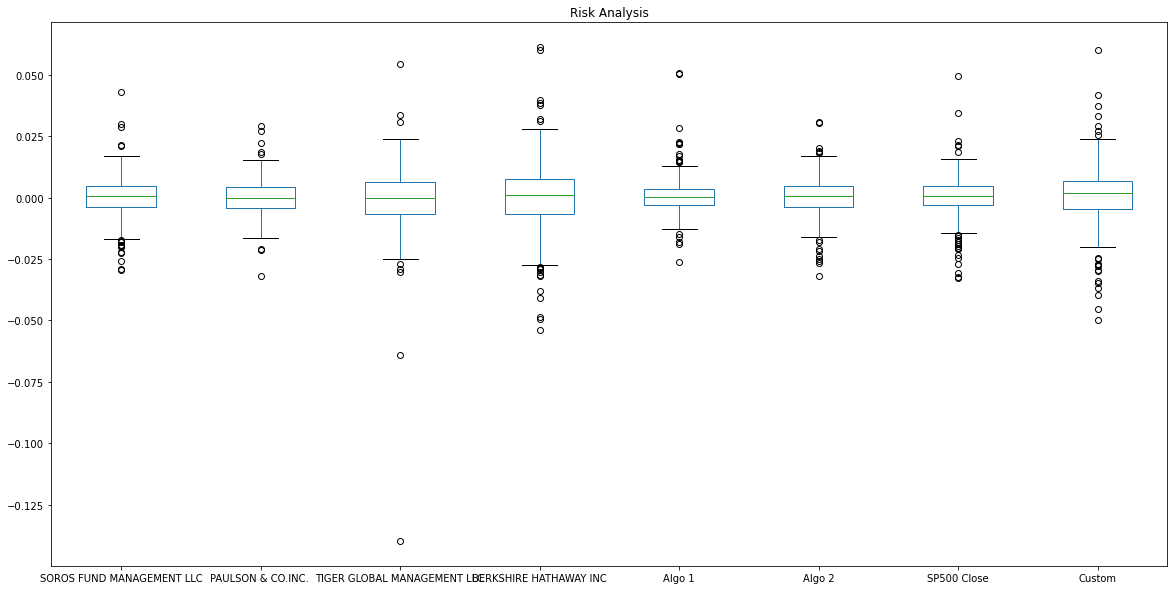

In [78]:
# Box plot to visually show risk
combined_dataframe.plot(kind = "box", figsize = (20,10), title = "Risk Analysis");


### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_dataframe.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Close                    0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [28]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_dataframe['SP500 Close'].std()
# Determine which portfolios are riskier than the S&P 500
combined_dataframe.std()>sp500_std 

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500 Close                    False
dtype: bool

### Calculate the Annualized Standard Deviation

In [29]:
# Calculate the annualized standard deviation (252 trading days)
combined_dataframe.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Close                    0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [30]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_dataframe.rolling(window = 21).std()
# Plot the rolling standard deviation


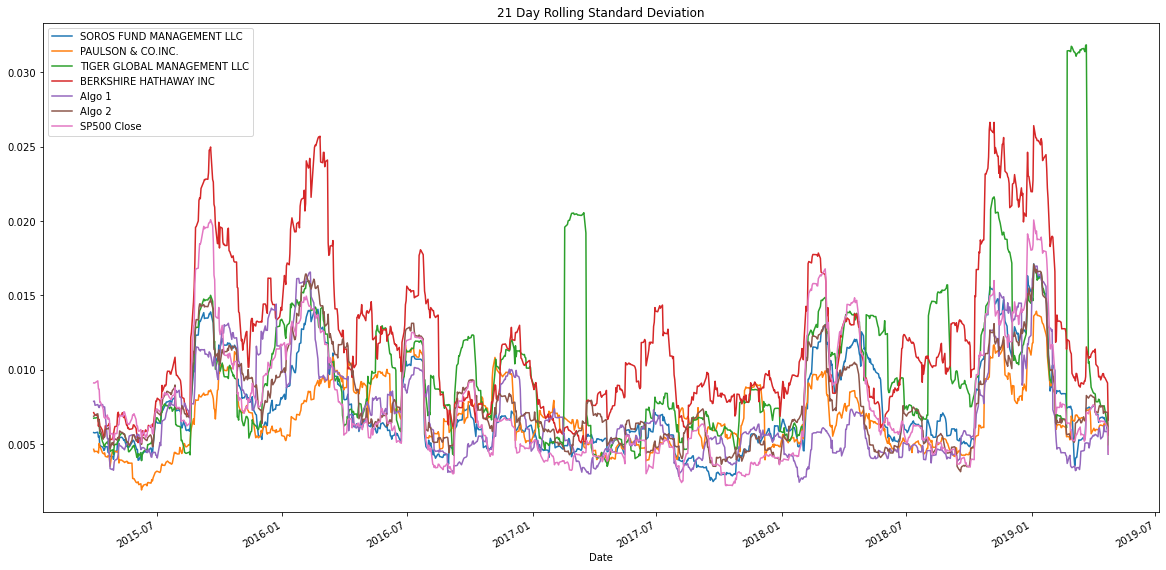

In [31]:
rolling_std.plot(figsize = (20,10), title = "21 Day Rolling Standard Deviation");

In [32]:
import seaborn as sns

### Calculate and plot the correlation

In [33]:
# Calculate the correlation
correlation = combined_dataframe.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 Close,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [34]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_dataframe["Algo 1"].rolling(window = 60).cov(combined_dataframe["SP500 Close"])
#rolling_covariance.plot(figsize = (20,10), title = "Rolling 60 Day Returns for Algo 1 and the S&P 500");

In [35]:
# Calculate variance of S&P 500
rolling_variance = combined_dataframe["SP500 Close"].rolling(window = 60).var()
#rolling_variance.plot(figsize = (20,10), title = "60 Day Rolling Variance for the S&P 500");

In [36]:
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.025920
2019-04-17    0.072232
2019-04-18    0.069934
2019-04-22    0.069525
2019-04-23    0.084337
Length: 1043, dtype: float64

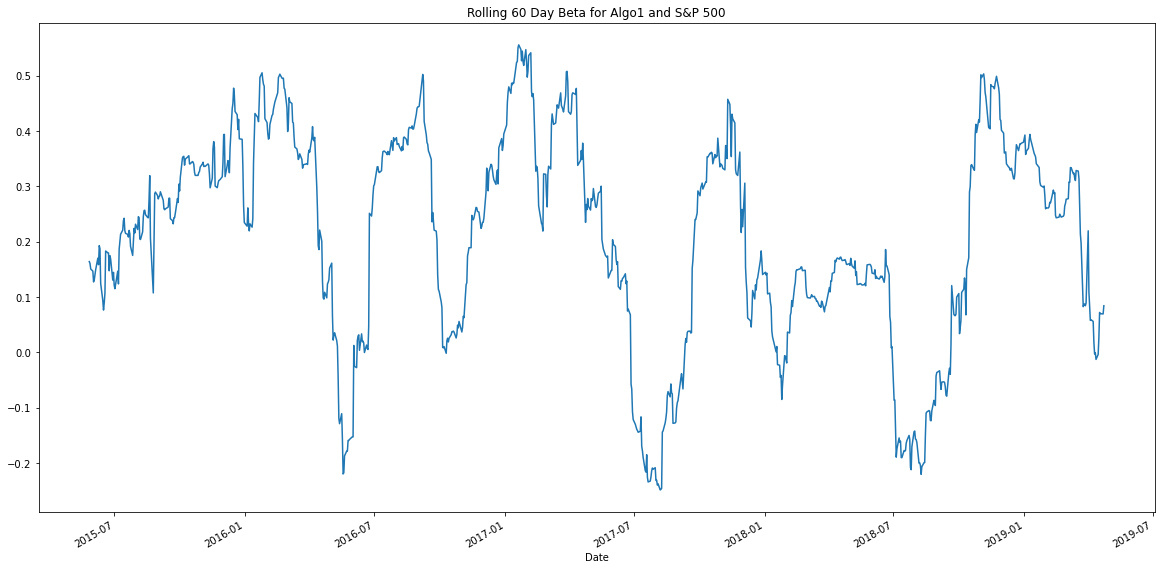

In [72]:
# Plot beta trend
rolling_beta.plot(figsize = (20,10), title = "Rolling 60 Day Beta for Algo1 and S&P 500");

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

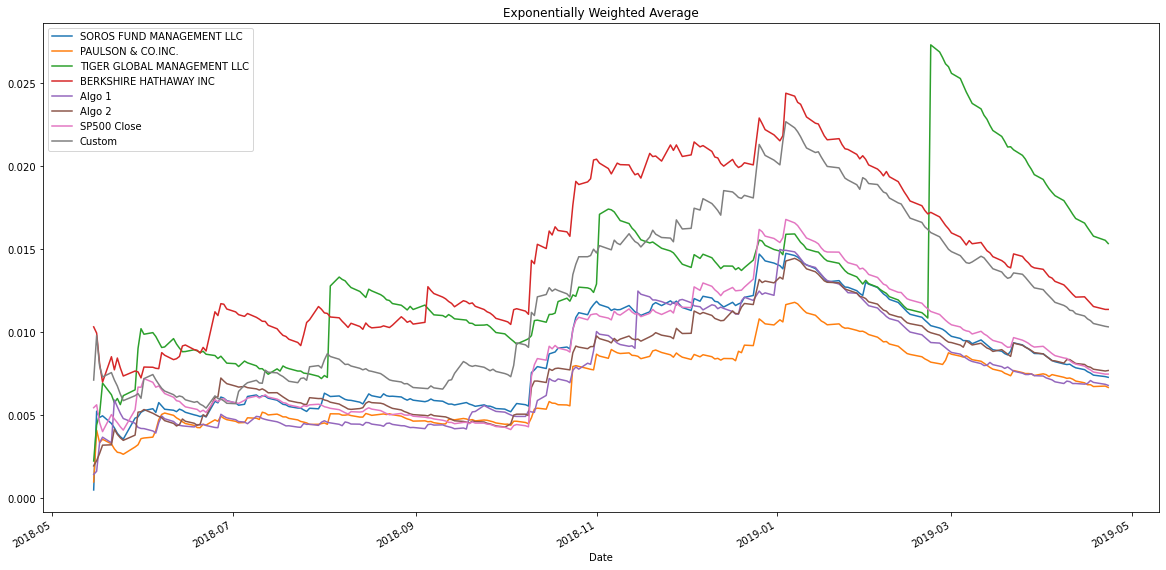

In [77]:
# Use `ewm` to calculate the rolling window
exp_weight_avg = combined_dataframe.ewm(halflife = 21).std().plot(figsize = (20,10), title = "Exponentially Weighted Average")


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Annualized Sharpe Ratios
sharp_ratio = (combined_dataframe.mean() * 252) / (combined_dataframe.std() * np.sqrt(252))
sharp_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Close                    0.648267
dtype: float64

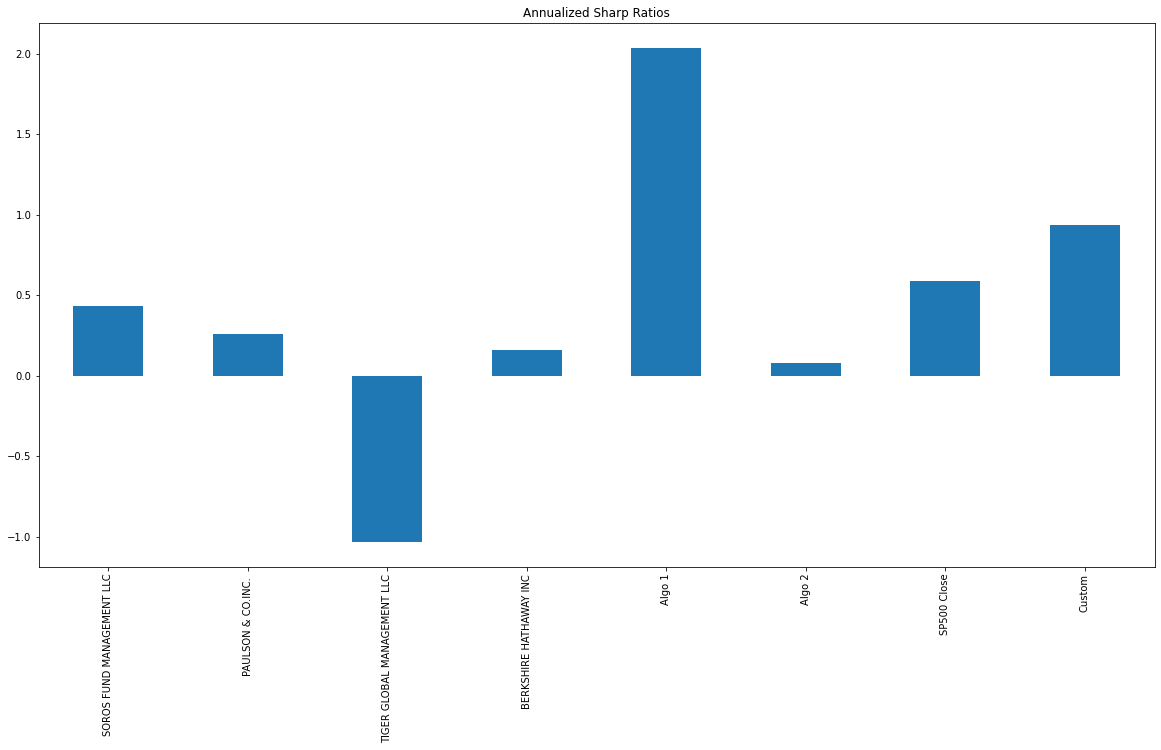

In [73]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind = "bar", figsize = (20,10), title = "Annualized Sharp Ratios");

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [41]:
# Reading data from 1st stock
appl_path = Path("./Resources/aapl_historical.csv")


In [42]:
aaple_csv = pd.read_csv(appl_path,index_col = "Trade DATE",parse_dates = True, infer_datetime_format = True)
aaple_csv = aaple_csv.sort_index()
aaple_csv.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [43]:
aaple_csv = aaple_csv.rename(columns={
    "NOCP" : "Apple",
})

In [44]:
aaple_csv.head()

,Symbol,Apple
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [45]:
aaple_csv = aaple_csv.drop(columns = ["Symbol"])

In [49]:
# Reading data from 2nd stock
cost_pathlib = Path("./Resources/cost_historical.csv")

In [50]:
cost_csv = pd.read_csv(cost_pathlib, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
cost_csv = cost_csv.sort_index()
cost_csv.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [51]:
cost_csv = cost_csv.rename(columns={
    "NOCP":"Costco"
})
cost_csv.head()

,Symbol,Costco
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [52]:
cost_csv = cost_csv.drop(columns = ["Symbol"])
cost_csv.head()

,Costco
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [53]:
# Reading data from 3rd stock
goog_pathlib = Path("./Resources/goog_historical.csv")

In [54]:
goog_csv = pd.read_csv(goog_pathlib, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
goog_csv = goog_csv.sort_index()
goog_csv.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [55]:
goog_csv = goog_csv.rename(columns = {
    "NOCP" : "Google"
})

In [56]:
goog_csv = goog_csv.drop(columns = ["Symbol"])


In [57]:
goog_csv.head()

,Google
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [58]:
# Combine all stocks in a single DataFrame
joined_df = pd.concat([goog_csv, cost_csv, aaple_csv], axis = "columns", join = "inner")
joined_df

,Google,Costco,Apple
Trade DATE,,,
2018-05-11,1098.26,195.76,188.59
2018-05-14,1100.20,195.88,188.15
2018-05-15,1079.23,195.48,186.44
2018-05-16,1081.77,198.71,188.18
2018-05-17,1078.59,199.60,186.99
...,...,...,...
2019-05-03,1185.40,244.62,211.75
2019-05-06,1189.39,244.23,208.48
2019-05-07,1174.10,240.18,202.86


In [59]:
# Calculate daily returns
joined_df = joined_df.pct_change()
joined_df.head()
# Drop NAs
joined_df = joined_df.dropna()
# Display sample data
joined_df

,Google,Costco,Apple
Trade DATE,,,
2018-05-14,0.001766,0.000613,-0.002333
2018-05-15,-0.019060,-0.002042,-0.009088
2018-05-16,0.002354,0.016523,0.009333
2018-05-17,-0.002940,0.004479,-0.006324
2018-05-18,-0.011339,-0.003206,-0.003637
...,...,...,...
2019-05-03,0.019602,0.007953,0.012431
2019-05-06,0.003366,-0.001594,-0.015443
2019-05-07,-0.012855,-0.016583,-0.026957


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [60]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = joined_df.dot(weights)

# Display sample data
weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [61]:
# Join your returns DataFrame to the original returns DataFrame
combined_dataframe['Custom'] = weighted_returns
combined_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [62]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_dataframe.dropna(inplace=True)
combined_dataframe.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [63]:
# Calculate the annualized `std`
combined_dataframe.std() * np.sqrt(252)


SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500 Close                    0.152054
Custom                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

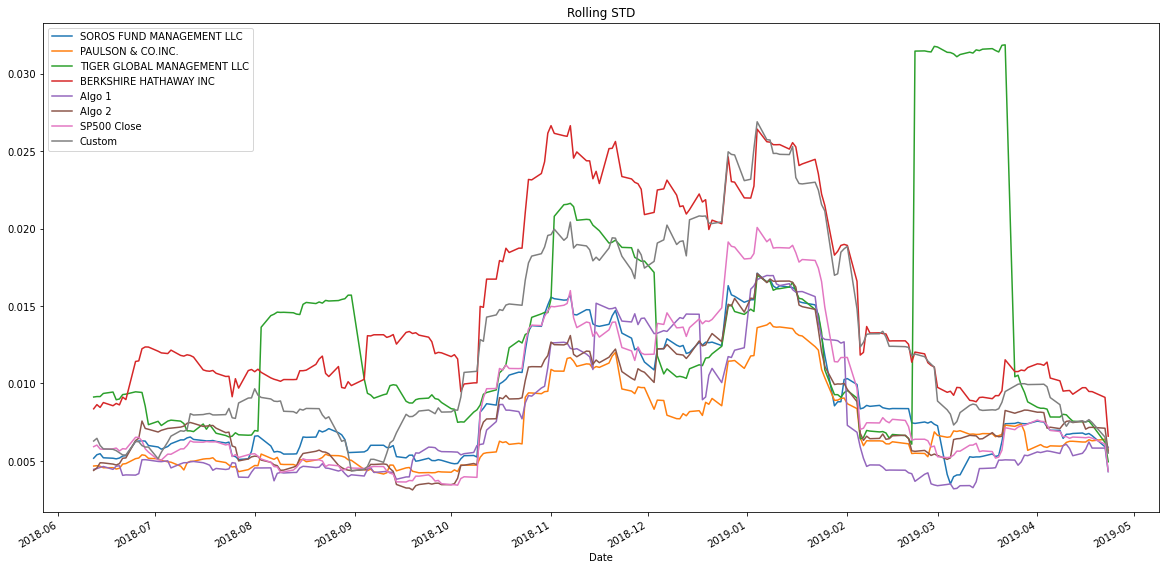

In [74]:
# Calculate rolling standard deviation
combined_dataframe.rolling(window = 21).std().plot(figsize = (20,10), title = "Rolling STD");

# Plot rolling standard deviation


### Calculate and plot the correlation

In [65]:
# Calculate and plot the correlation
cor = combined_dataframe.corr()
cor.style.background_gradient(cmap='bwr')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
SP500 Close,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [66]:
covar = combined_dataframe['Custom'].rolling(window = 60).cov(combined_dataframe['SP500 Close'])

In [67]:
# Calculate and plot Beta
var = combined_dataframe['SP500 Close'].rolling(window = 60).var()

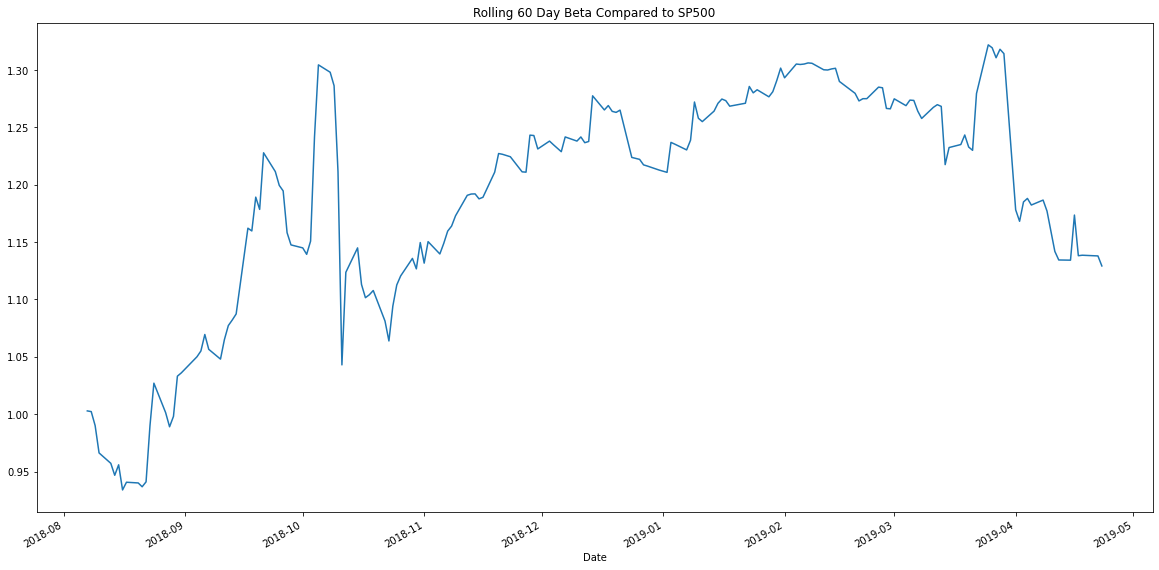

In [76]:
beta = (covar / var)
beta.plot(figsize = (20,10), title = "Rolling 60 Day Beta Compared to SP500");

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [69]:
# Calculate Annualzied Sharpe Ratios
sharp_ratio = (combined_dataframe.mean() * 252) / (combined_dataframe.std() * np.sqrt(252))
sharp_ratio

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500 Close                    0.584820
Custom                         0.933123
dtype: float64

<AxesSubplot:>

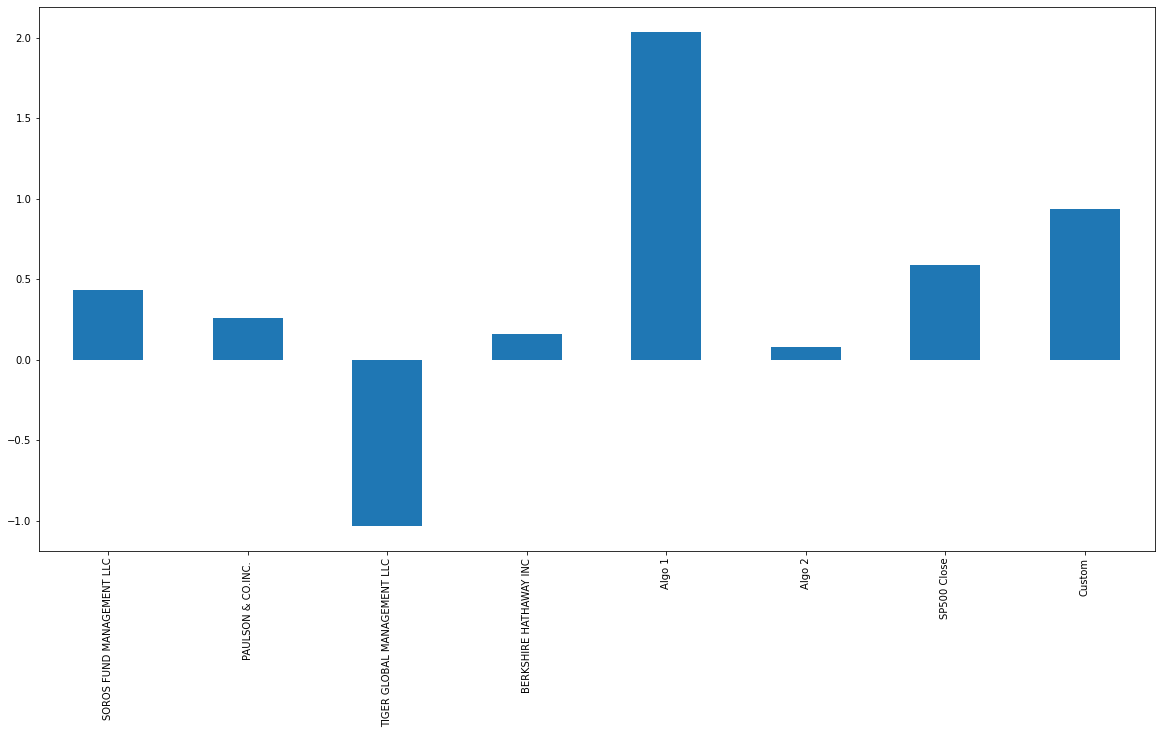

In [70]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind = "bar", figsize = (20,10))


### How does your portfolio do?

Write your answer here!

In [71]:
My portfolio is performing well. It is the second portfolio with the highest returns. 

SyntaxError: invalid syntax (<ipython-input-71-1ba7714ac7e8>, line 1)